# References: https://github.com/youbeebee/deeplearning_from_scratch

수강생분의 이름, 학번을 반영해주세요.

In [1]:
id = '20201944'
name = '안희진'
print(id, name)

20201944 안희진


구글 드라이브 연동

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


폴더 경로 설정

In [3]:
workspace_path = '/gdrive/My Drive/3-2/인공지능/Al_week8/codes'  # 과제 파일 업로드한 경로 반영

폴더 접근 허용

In [4]:
import sys
sys.path.append(workspace_path)

실험결과 재현 함수

In [5]:
import numpy as np
import random

def seed_everything(seed):
    np.random.seed(seed)
    random.seed(seed)
    # torch.manual_seed(seed)
    # if torch.cuda.is_available():
    #     torch.cuda.manual_seed(seed)
    #     if torch.cuda.device_count() > 1:
    #         torch.cuda.manual_seed_all(seed) # if use multi-GPU
    #     torch.backends.cudnn.deterministic = True
    #     torch.backends.cudnn.benchmark = False

# 신경망 학습

손실함수: 평균제곱오차, 교차 엔트로피 오차

In [6]:
import numpy as np
'''
손실 함수loss function : 신경망 성능의 '나쁨'을 나타내는 지표.
일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용
'''


# 4.2.1 평균 제곱 오차
# E = 1/2 * ∑ _k (yk-tk)²
# yk : 신경망의 출력
# tk : 정답 레이블
# k : 데이터의 차원 수
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답값

# ex1 '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mse = mean_squared_error(np.array(y), np.array(t))
print(mse)  # 0.0975
# ex2 '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse = mean_squared_error(np.array(y), np.array(t))
print(mse)  # 0.5975


# 4.2.2 교차 엔트로피 오차
# E = -∑ _k (tk * log(yk))
# log : 자연로그
# yk : 신경망의 출력
# tk : 정답 레이블(one-hot encoding)
# k : 데이터의 차원 수
# 실질적으로 정답일때의 추정의 자연로그를 계산하는 식이 됨
def cross_entropy_error(y, t):
    delta = 1e-7  # 0일때 -무한대가 되지 않기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))


# 동일한 계산
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답이이 맞을떄
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print(cee)  # 0.510825457099
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print(cee)  # 2.30258409299


0.09750000000000003
0.5975
0.510825457099338
2.3025840929945454


미니배치 교차 엔트로피 오차

In [7]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# 4.2.3 미니배치 학습
# 훈련 데이터 전체에 대한 오차함수
# E = -1/N * ∑ _n (∑ _k (tk * log(yk)))
# N : 데이터의 개수
# 훈련 데이터 전체에 대한 손실 함수를 계산하기에는 시간이 오래걸리기 때문에
# 일부를 추려 전체의 근사치로 이용할 수 있다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # 원-핫 인코딩 된 정답 레이블 (60000, 10)

# 무작위 10개 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


# 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size


# 4.2.5 왜 손실 함수를 설정하는가?
# 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다.
# 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.
# (매개변수의 미소한 변화에는 거의 반응을 보이지 않고 그 값이 분연속적으로 변화)


(60000, 784)
(60000,)


수치 미분

0.200000000000089
0.29999999999996696


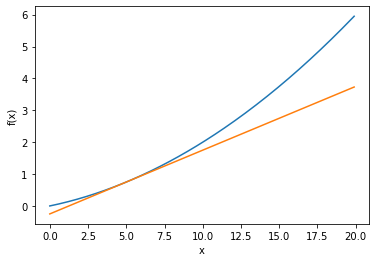

5.999999999998451
8.000000000000895


In [8]:
import numpy as np
import matplotlib.pylab as plt


# 4.3.1 미분
# 나쁜 구현 예
def numerical_diff_bad(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h
# h값이 너무 작아 반올림 오차를 일으킬 수 있음 10e-4정도가 적당하다고 알려짐
# 전방 차분에서는 차분이 0이 될 수 없어 오차가 발생
#  -> 오차를 줄이기 위해 중심 차분을 사용


def numerical_diff(f, x):
    h = 10e-4
    return (f(x + h) - f(x - h)) / (2 * h)


# 4.3.2 수치 미분의 예
# y = 0.01x² + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
# plt.show()

# x = 5, 10일때 미분
print(numerical_diff(function_1, 5))   # 0.200000000000089
print(numerical_diff(function_1, 10))  # 0.29999999999996696


# 접선의 함수를 구하는 함수
def tangent_line(f, x):
        d = numerical_diff(f, x)
        # print(d)
        y = f(x) - d*x
        return lambda t: d*t + y


tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x, y2)
plt.show()


# 4.3.3 편미분
# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)


# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0**2 + 4.0**2.0


# x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1


print(numerical_diff(function_tmp1, 3.0))  # 5.999999999998451
print(numerical_diff(function_tmp2, 4.0))  # 8.000000000000895


기울기 계산

[6. 8.]
[0. 4.]
[6. 0.]
[-6.11110793e-10  8.14814391e-10]
[-0.39785867  0.53047822]
[-2.45570041  3.27426722]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


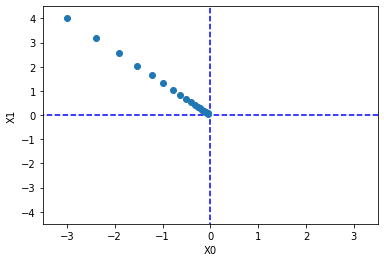

In [9]:
import numpy as np
import matplotlib.pylab as plt


# 앞 절에서 x0, x1에 대한 편미분을 변수별로 따로 계산했음.
# x0, x1의 편미분을 동시에 계산하고 싶다면?
# x0 = 3, x1 = 4일 때 (x0, x1) 양쪽의 편미분을 묶어 벡터로 정리한 것을 기울기gradient라고 한다.
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원

    return grad


# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)


print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]

# 4.4.1 경사법(경사 하강법)
# x0 = x0 - η*∂f/∂x0
# x1 = x1 - η*∂f/∂x1
# η(eta) : 갱신하는 양, 학습률learning rate
# 위 식을 반복


# f:최적화하려는 함수
# init_x : 초깃값
# lr : 학습률
# step_num : 반복횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad #손실값값 줄여줌줌


    return x, np.array(x_history)


# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ -6.11110793e-10   8.14814391e-10]

# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.01)
print(x)  # [ -6.11110793e-10   8.14814391e-10]

# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.001)
print(x)  # [ -6.11110793e-10   8.14814391e-10]

# 학습률이 너무 큼
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함

# 학습률이 너무 작음
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음

# 그래프
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


학습 알고리즘 구현

In [10]:
'''
전제
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
신경망 학습은 다음과 같이 4단계로 수행한다.

1단계 - 미니배치
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며,
그 미니배치의 손실함수 값을 줄이는 것이 목표이다.

2단계 - 기울기 산출
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복
1~3단계를 반복한다.

데이터를 무작위로 선정하기 때문에 확률적 경사 하강법stochastic gradient descent,
SGD라고 부른다.
'''
import os
import numpy as np
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient


class TwoLayerNet:
    """
    params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
    params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
    params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.

    grad : 기울기를 보관하는 딕셔너리 변수(numerical_gradient()의 반환값)
    grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향의 기울기.
    grads['W2']은 2번째 층의 가중치의 기울기, grads['b2']은 2번째 층의 편향의 기울기.
    """
    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


if __name__ == '__main__':
    net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
    print(net.params['W1'].shape)  # (784, 100)
    print(net.params['b1'].shape)  # (100,)
    print(net.params['W2'].shape)  # (100, 10)
    print(net.params['b2'].shape)  # (10,)

    x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
    t = np.random.rand(100, 10)   # 더미 정답 레이블(100장 분량)

    grads = net.numerical_gradient(x, t)  # 기울기 계산
    # 주의 : 실행하는데 아주 오래걸림
    print(grads['W1'].shape)  # (784, 100)
    print(grads['b1'].shape)  # (100,)
    print(grads['W2'].shape)  # (100, 10)
    print(grads['b2'].shape)  # (10,)


(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


# 오차역전파법

단순 계층 구현: 곱셈, 덧셈

In [11]:
# 5.4.1 곱셈 계층
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy


# 5.4.2 덧셈 계층
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy


if __name__ == '__main__':
    # 문제1의 예시
    apple = 100
    apple_num = 2
    tax = 1.1

    # 계층들
    mul_apple_layer = MulLayer()
    mul_tax_layer = MulLayer()

    # 순전파
    apple_price = mul_apple_layer.forward(apple, apple_num)
    price = mul_tax_layer.forward(apple_price, tax)

    print(price)  # 220.0

    # 역전파
    dprice = 1
    dapple_price, dtax = mul_tax_layer.backward(dprice)
    dapple, dapple_num = mul_apple_layer.backward(dapple_price)

    print(dapple, dapple_num, dtax)  # 2.2 110.0 200

    # 문제2의 예시
    orange = 150
    orange_num = 3

    # 계층들
    mul_apple_layer = MulLayer()
    mul_orange_layer = MulLayer()
    add_apple_orange_layer = AddLayer()
    mul_tax_layer = MulLayer()

    # 순전파
    apple_price = mul_apple_layer.forward(apple, apple_num)
    orange_price = mul_orange_layer.forward(orange, orange_num)
    all_price = add_apple_orange_layer.forward(apple_price, orange_price)
    price = mul_tax_layer.forward(all_price, tax)

    print(price)  # 715.0

    # 역전파
    dprice = 1
    dall_price, dtax = mul_tax_layer.backward(dprice)
    dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
    dornage, dorange_num = mul_orange_layer.backward(dorange_price)
    dapple, dapple_num = mul_apple_layer.backward(dapple_price)

    print(dapple_num, dapple, dornage, dorange_num, dtax)
    # 110.0 2.2 3.3 165.0 650


220.00000000000003
2.2 110.00000000000001 200
715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


활성화 함수, Affine, Softmax 계층 구현
- Affine Transformation: W*X + B

In [12]:
import numpy as np

# 5.5.1 ReLU 계층
"""
y = x (x > 0)
    0 (x <= 0)
∂y/∂x  = 1 (x > 0)
         0 (x <= 0)

ReLU의 계산 그래프
if x > 0
x     → relu → y
∂L/∂y ← relu ← ∂L/∂y

if x <= 0
x → relu → y
0 ← relu ← ∂L/∂y
"""


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


# 5.5.2 Sigmoid 계층
"""
y = 1 / (1 + exp(-x))

시그모이드의 계산 그래프
x → × → exp → + → / → y
-1↗         1↗

1단계
'/'노드
y = 1/x
∂y/∂x = -1/x^2 = -y²
상류에서 흘러온 값에 -y^2(순전파의 출력을 제곱하고 마이너스)을 곱해서 하류로 전달 : -∂L/∂y*y²

2단계
'+'노드
상류의 값을 그대로 하류로 전달 : -∂L/∂y*y²

3단계
'exp'노드
y = exp(x)
∂y/∂x = exp(x)
상류의 값에 순전파 때의 출력(이 경우엔 exp(-x))을 곱해 하류로 전달 : -∂L/∂y*y²*exp(-x)

4단계
'×'노드
순전파 때의 값을 서로 바꿔 곱함(여기서는 * -1) : ∂L/∂y*y²*exp(-x)
∂L/∂y*y^2*exp(-x)는 정리하면 ∂L/∂y*y(1-y)가 된다.(순전파의 출력만으로 계산할 수 있다)

정리
x            → sigmoid → y
∂L/∂y*y(1-y) ← sigmoid ← ∂L/∂y
"""


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


if __name__ == '__main__':
    x = np.array([[1.0, -0.5], [-2.0, 3.0]])
    print(x)
    """
    [[ 1.  -0.5]
     [-2.   3. ]]
    """

    mask = (x <= 0)
    print(mask)
    """
    [[False  True]
     [ True False]]
    """

    # 5.6 Affine/Softmax 계층 구현하기
    # 5.6.1 Affine 계층
    """
    신경망의 순전파에서는 가중치 신호의 총합을 계산하기 때문에 행렬의 내적을 사용했다.(3.3 참고)
    """
    X = np.random.rand(2)     # 입력
    W = np.random.rand(2, 3)  # 가중치
    B = np.random.rand(3)     # 편향

    print(X.shape)  # (2,)
    print(W.shape)  # (2, 3)
    print(B.shape)  # (3,)

    Y = np.dot(X, W) + B
    # 신경망의 순전파 때 수행하는 행렬의 내적은 기하학에서는 어파인 변환이라고 한다.

"""
Affine 계층의 계산 그래프
X, W, B는 행렬(다차원 배열)

1. X ↘    X·W
       dot → + → Y
2. W ↗ 3.B ↗

1. ∂L/∂X = ∂L/∂Y·W^T
   (2,)    (3,)  (3,2)
2. ∂L/∂W = X^T·∂L/∂Y
   (2,3)  (2,1)(1,3)
3. ∂L/∂B = ∂L/∂Y
   (3,)    (3,)
W^T : W의 전치행렬(W가 (2,3)이라면 W^T는(3,2)가 된다.)
X = (x0, x1, x2, ..., xn)
∂L/∂X = (∂L/∂x0, ∂L/∂x1, ∂L/∂x2, ..., ∂L/∂xn)
따라서 X와 ∂L/∂X의 형상은 같다.
"""

# 5.6.2 배치용 Affine 계층
"""
입력 데이터로 X 하나만이 아니라 데이터 N개를 묶어 순전파하는 배치용 계층을 생각

배치용 Affine 계층의 계산 그래프
X의 형상이 (N,2)가 됨.

1. ∂L/∂X = ∂L/∂Y·W^T
   (N,2)   (N,3) (3,2)
2. ∂L/∂W = X^T·∂L/∂Y
   (2,3)  (2,N)(N,3)
3. ∂L/∂B = ∂L/∂Y의 첫 번째 축(0축, 열방향)의 합.
   (3,)    (N,3)

편향을 더할 때에 주의해야 한다. 순전파 때의 편향 덧셈은 X·W에 대한 편향이
각 데이터에 더해진다. 예를 들어 N=2일 경우 편향은 두 데이터 각각에 더해진다.
"""
if __name__ == '__main__':
    X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
    B = np.array([1, 2, 3])
    print(X_dot_W)
    """
    [[ 0  0  0]
     [10 10 10]]
    """
    print(X_dot_W + B)
    """
    [[ 1  2  3]
     [11 12 13]]
    """
    """
    순전파의 편향 덧셈은 각각의 데이터에 더해지므로
    역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다.
    """
    dY = np.array([[1, 2, 3], [4, 5, 6]])
    print(dY)
    """
    [[1 2 3]
     [4 5 6]]
    """
    dB = np.sum(dY, axis=0)
    print(dB)  # [5 7 9]
    """
    데이터가 두 개일 때 편향의 역전파는 두 데이터에 대한 미분을 데이터마다
    더해서 구한다.
    np.sum()에서 0번째 축(데이터를 단위로 한 축. axis=0)에 대해서 합을 구한다.
    """


class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx


# 5.6.3 Softmax-with-Loss 계층
"""
소프트맥스 계층 : 입력 값을 정규화(출력의 합이 1이 되도록 변경)하여 출력
학습과 추론 중 학습에서 주로 사용
소프트맥스 계층과 손실 함수(교차 엔트로피 오차)를 포함해 계산 그래프를 그림
자세한 역전파 계산은 부록A 참고.

간소화한 Softmax-with-Loss계층의 계산 그래프
a1   →    |         | → y1 → |         |
y1 - t1 ← |         |   t1 ↗  | Cross   |
a2   →    | Softmax | → y2 → | Entropy | → L
y2 - t2 ← |         |   t2 ↗  | Error   | ← 1
a3   →    |         | → y3 → |         |
y3 - t3 ←               t3 ↗
입력 : (a1, a2, a3)
정규화된 출력 : (y1, y2, y3)
정답 레이블 (t1, t2, t3)
손실 : L

역전파로 Softmax 계층의 출력과 정답 레이블의 차분 값
(y1 - t1, y2 - t2, y2 - t2)이 전달됨.
이는 교차 엔트로피 오차 함수가 그렇게 설계되었기 때문.
항등 함수의 손실 함수로는 평균 제곱 오차를 사용하는데,
그럴 경우 역전파의 결과가 (y1 - t1, y2 - t2, y2 - t2)로 말끔히 떨어짐.

ex) 정답 레이블 t = (0, 1, 0) 일 때,
소프트맥스가 (0.3, 0.2, 0.5)를 출력했다고 할 때, 소프트맥스 계층의 역전파는
(0.3, -0.8, 0.5)로 앞 계층에 큰 오차를 전파하게 됨
소프트맥스가 (0.01, 0.99, 0.)을 출력했다면 역전파는 (0.01, -0.01, 0)
으로 오차가 작아짐
"""


# yk = exp(ak) / ∑(i=1 to n)(exp(ai))
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


def cross_entropy_error(y, t):
    delta = 1e-7  # 0일때 -무한대가 되지 않기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None  # 손실
        self.y = None     # softmax의 출력
        self.t = None     # 정답 레이블(원-핫 벡터)

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)  # 3.5.2, 4.2.2에서 구현
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = self.y - self.t / batch_size

        return dx


if __name__ == '__main__':
    swl = SoftmaxWithLoss()
    a = np.array([1, 8, 3])   # 비슷하게 맞춤
    t = np.array([0, 1, 0])
    print(swl.forward(a, t))  # 0.0076206166295
    print(swl.backward())     # [ 0.00090496  0.65907491  0.00668679]

    a = np.array([1, 3, 8])   # 오차가 큼
    print(swl.forward(a, t))  # 5.00760576266
    print(swl.backward())   # [  9.04959183e-04 -3.26646539e-01 9.92408247e-01]


[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]
(2,)
(2, 3)
(3,)
[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]
[[1 2 3]
 [4 5 6]]
[5 7 9]
0.007620616629495912
[0.00090496 0.65907491 0.00668679]
5.0076057626568575
[ 9.04959183e-04 -3.26646539e-01  9.92408247e-01]


오차역전파법 구현

In [13]:
import os
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

# 5.7.1 신경망 학습의 전체 그림
"""
(4.5와 동일)
전제
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
신경망 학습은 다음과 같이 4단계로 수행한다.

1단계 - 미니배치
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며,
그 미니배치의 손실함수 값을 줄이는 것이 목표이다.

2단계 - 기울기 산출
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복
1~3단계를 반복한다.

수치 미분과 오차역전파법은 2단계에서 사용
수치 미분은 구현은 쉽지만 계산이 오래걸림
오차역전파법을 통해 기울기를 효율적이고 빠르게 구할 수 있음
"""

# 5.7.2 오차역전파법을 이용한 신경망 구현하기
"""
TwoLayerNet 클래스로 구현
 * 클래스의 인스턴스 변수
params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
        params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
        params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.
layers : 신경망의 계층을 보관하는 순서가 있는 딕셔너리 변수
        layers['Affine1'], layers['Relu1'], layers['Affine2']와 같이
        각 계층을 순서대로 유지
lastLayer : 신경망의 마지막 계층(여기서는 SoftmaxWithLoss)

 * 클래스의 메서드
__init__(...) : 초기화 수행
predict(x) : 예측(추론)을 수행한다. x는 이미지 데이터
loss(x, t) : 손실함수의 값을 구한다. x는 이미지 데이터, t는 정답 레이블
accuracy(x, t) : 정확도를 구한다.
numerical_gradient(x, t) : 가중치 매개변수의 기울기를 수치 미분으로 구함(앞 장과 같음)
gradient(x, t) : 가중치 매개변수의 기울기를 오차역전파법으로 구함
"""


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
        weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads


"""
신경망의 계층을 순서가 있는 딕셔너리에서 보관,
따라서 순전파때는 추가한 순서대로 각 계층의 forward()를 호출하기만 하면 된다.
역전파때는 계층을 반대 순서로 호출하기만 하면 된다.
신경망의 구성 요소를 모듈화하여 계층으로 구현했기 때문에 구축이 쉬워진다.
"""


# 5.7.3 오차역전파법으로 구한 기울기 검증하기
"""
기울기를 구하는데는 두 가지 방법이 있다.
1. 수치 미분 : 느리다. 구현이 쉽다.
2. 해석적으로 수식을 풀기(오차 역전파법) : 빠르지만 실수가 있을 수 있다.
두 기울기 결과를 비교해서 오차역전파법을 제대로 구현했는지 검증한다.
이 작업을 기울기 확인gradient check라고 한다.
"""
if __name__ == '__main__':
    # 데이터 읽기
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

    x_batch = x_train[:3]
    t_batch = t_train[:3]

    grad_numerical = network.numerical_gradient(x_batch, t_batch)
    grad_backprop = network.gradient(x_batch, t_batch)

    # 각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.
    for key in grad_numerical.keys():
        diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
        print(key + ":" + str(diff))
        """
        수치 미분과 오차역전파법으로 구한 기울기의 차이가 매우 작다.
        실수 없이 구현되었을 확률이 높다.
        정밀도가 유한하기 때문에 오차가 0이 되지는 않는다.
        """


W1:3.02721825537068e-13
b1:1.062745827755049e-12
W2:9.697626222014699e-13
b2:1.1990409082285326e-10


오차역전파법을 사용한 학습 구현

In [14]:
import os
import numpy as np
from dataset.mnist import load_mnist

# 하이퍼 파라미터
iters_num = 10000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
seed = 0  # 실험결과 재현을 위함, 수정 불가
seed_everything(seed)

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

best_test_acc = 0
for i in range(iters_num):
    # print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차역전파법으로 기울기 계산
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        if test_acc > best_test_acc:
            best_test_acc = max(test_acc, best_test_acc)

print("## best test acc | " + str(best_test_acc))


train acc, test acc | 0.109, 0.1136
train acc, test acc | 0.9051333333333333, 0.9069
train acc, test acc | 0.92165, 0.9212
train acc, test acc | 0.9334166666666667, 0.9336
train acc, test acc | 0.9450166666666666, 0.943
train acc, test acc | 0.9513333333333334, 0.9482
train acc, test acc | 0.9566166666666667, 0.9532
train acc, test acc | 0.9614166666666667, 0.9572
train acc, test acc | 0.9634166666666667, 0.9582
train acc, test acc | 0.9661166666666666, 0.9613
train acc, test acc | 0.9697333333333333, 0.9627
train acc, test acc | 0.9711, 0.9635
train acc, test acc | 0.9733, 0.9669
train acc, test acc | 0.9743833333333334, 0.9662
train acc, test acc | 0.9755, 0.9684
train acc, test acc | 0.97745, 0.9689
train acc, test acc | 0.9785833333333334, 0.9699
## best test acc | 0.9699


# 실습 과제: 개선시도 2가지, 0.9699 보다 높은 test accuracy 달성
아래의 2가지를 모두 개선 시도하여 0.9699 보다 높은 test accuracy 달성하시오. 단, PyTorch, 학습된 모델, CNN 사용 불가합니다.

* 1) 네트워크 구조 개선(아래의 TwoLayerNet 계층 수정): Affine 최소 3개 이상, ReLU 최소 2개 이상 사용
 * Affine 개수에 맞게 가중치 초기화, gradient 계산, 매개변수 갱신 부분도 수정할 것
  * 개선내용 설명: (Affine 3개, ReLU 2개 사용했습니다)
* 2) 학습 하이퍼파라미터 변경
 * 개선내용 설명: (iters_num = 50000으로 변경해보았습니다)

오차역전파법 구현

In [15]:
import os
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

# 5.7.1 신경망 학습의 전체 그림
"""
(4.5와 동일)
전제
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
신경망 학습은 다음과 같이 4단계로 수행한다.

1단계 - 미니배치
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며,
그 미니배치의 손실함수 값을 줄이는 것이 목표이다.

2단계 - 기울기 산출
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복
1~3단계를 반복한다.

수치 미분과 오차역전파법은 2단계에서 사용
수치 미분은 구현은 쉽지만 계산이 오래걸림
오차역전파법을 통해 기울기를 효율적이고 빠르게 구할 수 있음
"""

# 5.7.2 오차역전파법을 이용한 신경망 구현하기
"""
TwoLayerNet 클래스로 구현
 * 클래스의 인스턴스 변수
params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
        params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
        params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.
layers : 신경망의 계층을 보관하는 순서가 있는 딕셔너리 변수
        layers['Affine1'], layers['Relu1'], layers['Affine2']와 같이
        각 계층을 순서대로 유지
lastLayer : 신경망의 마지막 계층(여기서는 SoftmaxWithLoss)

 * 클래스의 메서드
__init__(...) : 초기화 수행
predict(x) : 예측(추론)을 수행한다. x는 이미지 데이터
loss(x, t) : 손실함수의 값을 구한다. x는 이미지 데이터, t는 정답 레이블
accuracy(x, t) : 정확도를 구한다.
numerical_gradient(x, t) : 가중치 매개변수의 기울기를 수치 미분으로 구함(앞 장과 같음)
gradient(x, t) : 가중치 매개변수의 기울기를 오차역전파법으로 구함
"""


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
        weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu() 
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        grads['W3'] = self.layers['Affine3'].dW
        grads['b3'] = self.layers['Affine3'].db

        return grads


"""
신경망의 계층을 순서가 있는 딕셔너리에서 보관,
따라서 순전파때는 추가한 순서대로 각 계층의 forward()를 호출하기만 하면 된다.
역전파때는 계층을 반대 순서로 호출하기만 하면 된다.
신경망의 구성 요소를 모듈화하여 계층으로 구현했기 때문에 구축이 쉬워진다.
"""


# 5.7.3 오차역전파법으로 구한 기울기 검증하기
"""
기울기를 구하는데는 두 가지 방법이 있다.
1. 수치 미분 : 느리다. 구현이 쉽다.
2. 해석적으로 수식을 풀기(오차 역전파법) : 빠르지만 실수가 있을 수 있다.
두 기울기 결과를 비교해서 오차역전파법을 제대로 구현했는지 검증한다.
이 작업을 기울기 확인gradient check라고 한다.
"""
if __name__ == '__main__':
    # 데이터 읽기
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

    x_batch = x_train[:3]
    t_batch = t_train[:3]

    grad_numerical = network.numerical_gradient(x_batch, t_batch)
    grad_backprop = network.gradient(x_batch, t_batch)

    # 각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.
    for key in grad_numerical.keys():
        diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
        print(key + ":" + str(diff))
        """
        수치 미분과 오차역전파법으로 구한 기울기의 차이가 매우 작다.
        실수 없이 구현되었을 확률이 높다.
        정밀도가 유한하기 때문에 오차가 0이 되지는 않는다.
        """


W1:2.519068139686189e-13
b1:1.0554086299569346e-12
W2:6.198164914472605e-07
b2:8.243809981956418e-05
W3:8.365920258355887e-13
b3:1.2034818003270332e-10


오차역전파법을 사용한 학습 구현

In [17]:
import os
import numpy as np
from dataset.mnist import load_mnist

# 하이퍼 파라미터
iters_num = 50000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
seed = 0  # 실험결과 재현을 위함, 수정 불가
seed_everything(seed)

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

best_test_acc = 0
for i in range(iters_num):
    # print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차역전파법으로 기울기 계산
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2','W3','b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        if test_acc > best_test_acc:
            best_test_acc = max(test_acc, best_test_acc)

print("## best test acc | " + str(best_test_acc))


train acc, test acc | 0.08626666666666667, 0.0834
train acc, test acc | 0.6481, 0.649
train acc, test acc | 0.8866166666666667, 0.8858
train acc, test acc | 0.9253333333333333, 0.9268
train acc, test acc | 0.9464, 0.9425
train acc, test acc | 0.9561166666666666, 0.9501
train acc, test acc | 0.9641166666666666, 0.9594
train acc, test acc | 0.9674333333333334, 0.9622
train acc, test acc | 0.9695333333333334, 0.9638
train acc, test acc | 0.9734333333333334, 0.9674
train acc, test acc | 0.9744833333333334, 0.9656
train acc, test acc | 0.9754833333333334, 0.9646
train acc, test acc | 0.9790166666666666, 0.9683
train acc, test acc | 0.9797833333333333, 0.9686
train acc, test acc | 0.9811666666666666, 0.9684
train acc, test acc | 0.9842, 0.9718
train acc, test acc | 0.9849833333333333, 0.9696
train acc, test acc | 0.9864666666666667, 0.9722
train acc, test acc | 0.9868333333333333, 0.9734
train acc, test acc | 0.9864833333333334, 0.9719
train acc, test acc | 0.9850333333333333, 0.9699
train a